LOGISTIC REGRESSION

Problem Statement :

"You have a telecom firm which has collected data of all its customers"
The main types of attributes are :

1.Demographics (age, gender etc.)
2.Services availed (internet packs purchased, special offers etc)
3.Expenses (amount of recharge done per month etc.)
Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not.

So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable 1 means that the customer has churned and 0 means the customer has not churned.
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.
DATA

PROCEDURE

Import the required libraries

Importing all datasets

Merging all datasets based on condition ("customer_id ")

Data Cleaning - checking the null values

Check for the missing values and replace them

Model building
• Binary encoding
• One hot encoding
• Creating dummy variables and removing the extra columns

Feature selection using RFE - Recursive Feature Elimination

Getting the predicted values on train set

Creating a new column predicted with 1 if churn > 0.5 else 0

Create a confusion matrix on train set and test

Check the overall accuracy

In [1]:
#importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#warning handling
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing datasets
demographics = pd.read_csv('customer_data.csv')
services = pd.read_csv('internet_data.csv')
expenses = pd.read_csv('churn_data.csv')

Making basic checks in datasets to get some idea about the data.

In [4]:
demographics.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7042 non-null   object
 1   gender         7042 non-null   object
 2   SeniorCitizen  7042 non-null   int64 
 3   Partner        7042 non-null   object
 4   Dependents     7042 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


The SeniorCitizen column is also catigorical data encoded into binary int64 type.  Not to be treated as numerical.

In [6]:
demographics.isnull().sum() # no nulls so that's great

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [7]:
demographics.nunique()

customerID       7042
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

Customer id refers to unique customers.  Its unique count is same as that of datasize which means here are no duplicates.

All other variables are binary in nature sowe will treat them accordingly in further analysis

In [8]:
services.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [9]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7042 non-null   object
 1   MultipleLines     7042 non-null   object
 2   InternetService   7042 non-null   object
 3   OnlineSecurity    7042 non-null   object
 4   OnlineBackup      7042 non-null   object
 5   DeviceProtection  7042 non-null   object
 6   TechSupport       7042 non-null   object
 7   StreamingTV       7042 non-null   object
 8   StreamingMovies   7042 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [10]:
services.isnull().sum() # no nulls so that's great

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [11]:
services.nunique() # no duplicates in this either

customerID          7042
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [12]:
for index in services.columns[1:]:
    print(f'\nUniques in {index} are :')
    print(services[index].unique())


Uniques in MultipleLines are :
['No phone service' 'No' 'Yes']

Uniques in InternetService are :
['DSL' 'Fiber optic' 'No']

Uniques in OnlineSecurity are :
['No' 'Yes' 'No internet service']

Uniques in OnlineBackup are :
['Yes' 'No' 'No internet service']

Uniques in DeviceProtection are :
['No' 'Yes' 'No internet service']

Uniques in TechSupport are :
['No' 'Yes' 'No internet service']

Uniques in StreamingTV are :
['No' 'Yes' 'No internet service']

Uniques in StreamingMovies are :
['No' 'Yes' 'No internet service']


In [13]:
expenses.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


Total charges is clearly a numerical column. We have to exclusively typecast it into float64. We will do this using pandas.to_numeric function.  there might be some erors so we also added exception handling parameter 'coerce'.

In [15]:
expenses.TotalCharges = pd.to_numeric(expenses.TotalCharges, errors='coerce')

In [16]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7031 non-null   float64
 8   Churn             7042 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


In [17]:
expenses.isnull().sum() # we have few nulls in Total charges column now we will deal with that later.

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
expenses.nunique()

customerID          7042
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6529
Churn                  2
dtype: int64

In [19]:
for index in ['PhoneService','Contract','PaperlessBilling', 'PaymentMethod', 'Churn']:
    print(f'\nUniques in {index} are :')
    print(expenses[index].unique())


Uniques in PhoneService are :
['No' 'Yes']

Uniques in Contract are :
['Month-to-month' 'One year' 'Two year']

Uniques in PaperlessBilling are :
['Yes' 'No']

Uniques in PaymentMethod are :
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Uniques in Churn are :
['No' 'Yes']


In [20]:
# everything seems good so now we concatinate all the dataframes using pandas.concat.
data = pd.merge(demographics, services, on = 'customerID')
data = pd.merge(data,expenses, on = 'customerID')

In [21]:
data.shape

(7042, 21)

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
# very small number of nulls so we can drop them
data.dropna(axis = 0, inplace = True)

In [25]:
data.shape

(7031, 21)

We can start exploratory Data Analysis now

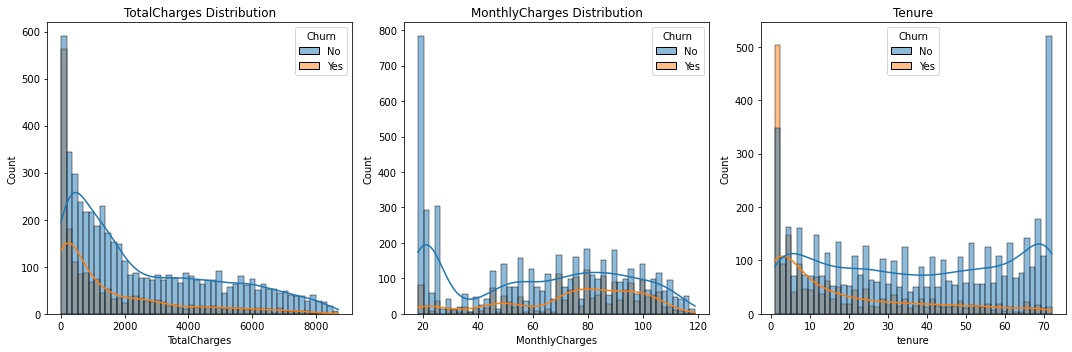

In [26]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].set_title('TotalCharges Distribution')
p1 = sns.histplot(data = data, x = 'TotalCharges', kde = True, bins = 50, hue = 'Churn', ax = axs[0])
axs[1].set_title('MonthlyCharges Distribution')
sns.histplot(data = data, x = 'MonthlyCharges', kde = True, bins = 50, hue = 'Churn', ax = axs[1] )
axs[2].set_title('Tenure')
sns.histplot(data = data, x = 'tenure', kde = True, bins = 50, hue = 'Churn', ax = axs[2] )
plt.tight_layout()

There is no normal distribution in Total Charges and Monthly charges. However they appear to be strongly related to output. So, we will keep them in Model. The extremes of tenures have high frequency but for most of the data, the curves are flat. We shall keep it in our model and later deal with it based on model accuracy significance.

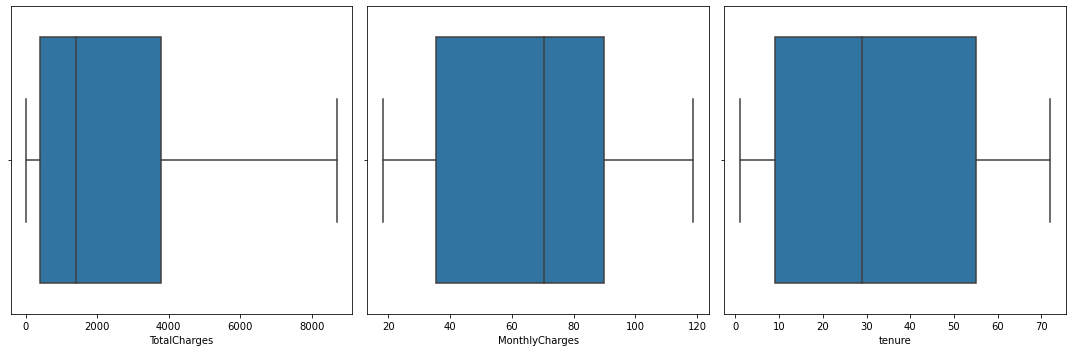

In [27]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(data = data, x = 'TotalCharges',  hue = 'Churn', ax = axs[0])

sns.boxplot(data = data, x = 'MonthlyCharges',  hue = 'Churn', ax = axs[1] )

sns.boxplot(data = data, x = 'tenure',  hue = 'Churn', ax = axs[2] )
plt.tight_layout()

Since there are no outliers in our numerical data, there is no need for outlier treatment

In [28]:
def categoricalAnalysis(x):
    fig, axs = plt.subplots(1,2, figsize = (10,5))
    plt.suptitle('Churn Frequency')
    axs[0].set_title(x)
    p1 = sns.countplot(data = data, x = x, ax = axs[0])
    axs[1].set_title('Churn')
    p2 = sns.countplot(data = data, x = x, hue = 'Churn', ax = axs[1])
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    


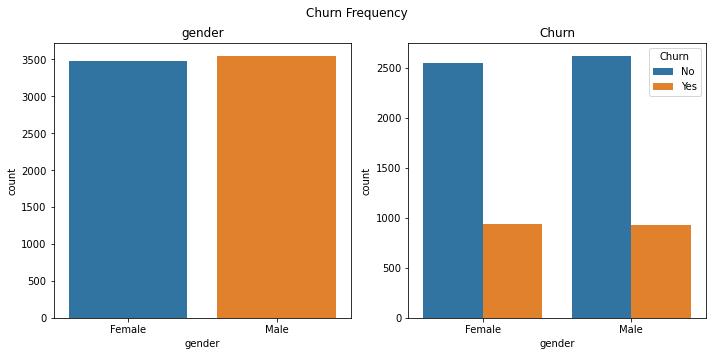

In [29]:
categoricalAnalysis('gender')

Gender doesn't seem to affect data so we won't consider it in our model.

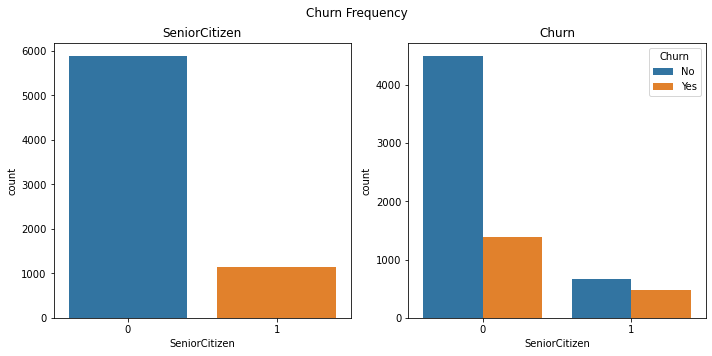

In [30]:
categoricalAnalysis('SeniorCitizen')

Being Senior Citisen highly affects the dependent Variable so we will keep it.

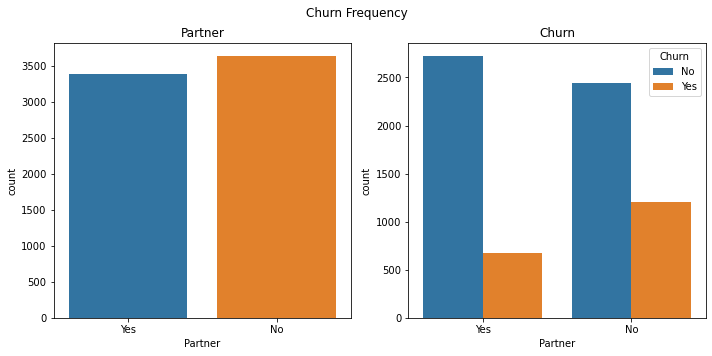

In [31]:
categoricalAnalysis('Partner')

Being Partner doesnt seem to have much effect but their individula churn ratios have some variations. Lets keep it in model for now. Drop later if required.

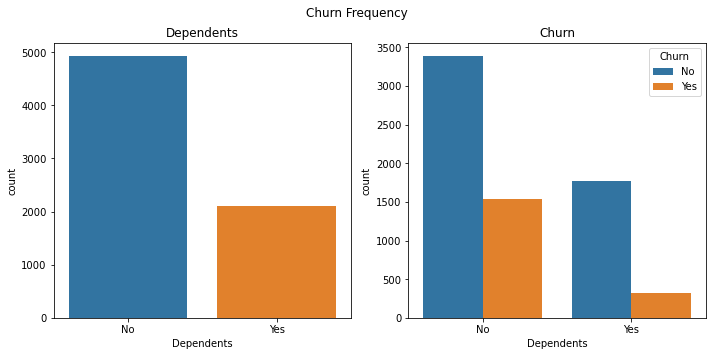

In [32]:
categoricalAnalysis('Dependents')

Obviously being Dependent is highly affecting the data so this variable stays.

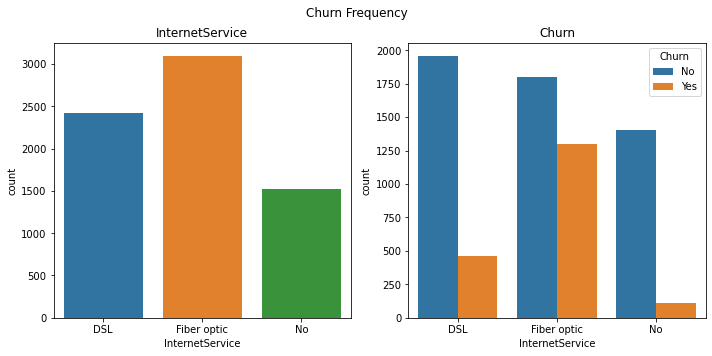

In [33]:
categoricalAnalysis('InternetService')

Due to significant variations InternetServices will be included in model

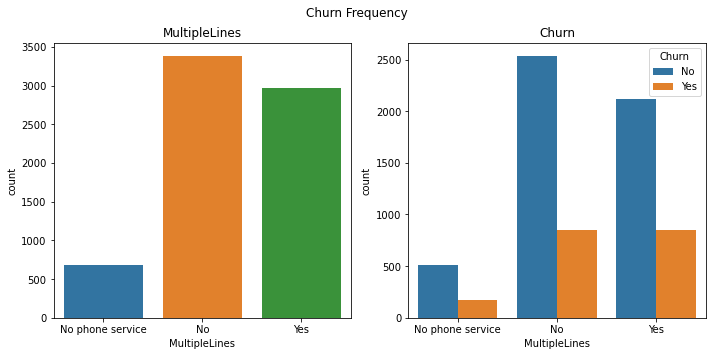

In [34]:
categoricalAnalysis('MultipleLines')

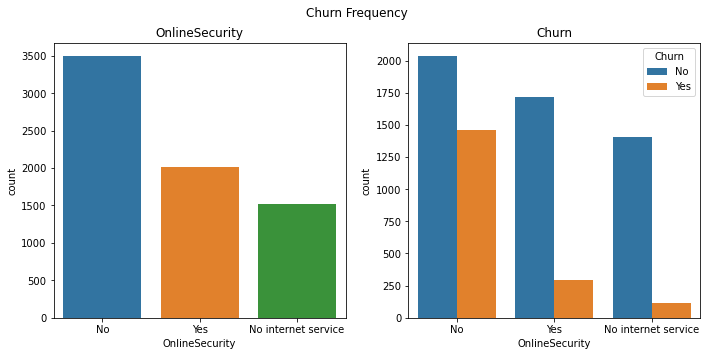

In [35]:
categoricalAnalysis('OnlineSecurity')

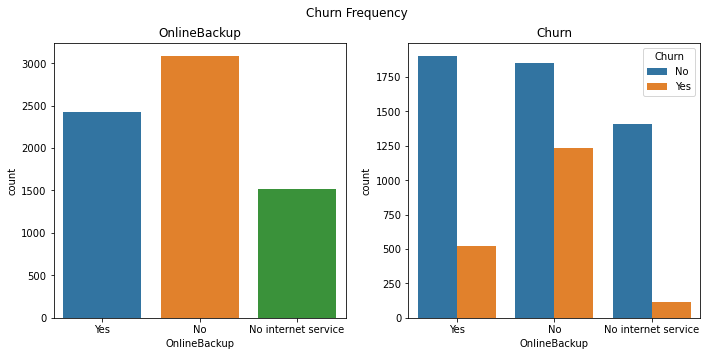

In [36]:
categoricalAnalysis('OnlineBackup')

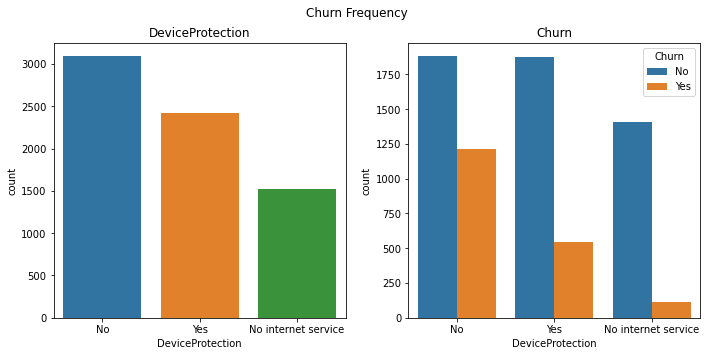

In [37]:
categoricalAnalysis('DeviceProtection')

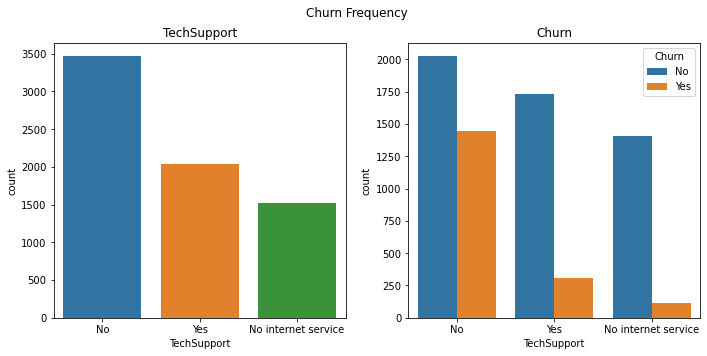

In [38]:
categoricalAnalysis('TechSupport')

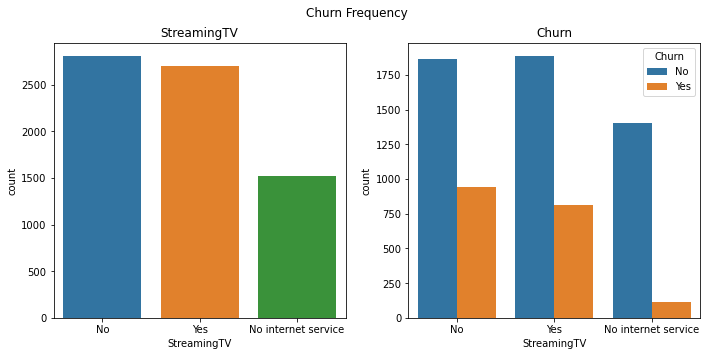

In [39]:
categoricalAnalysis('StreamingTV')

No internet Service data is common in multiple columns and Streaming Tv doent affect churn data so we can drop it.

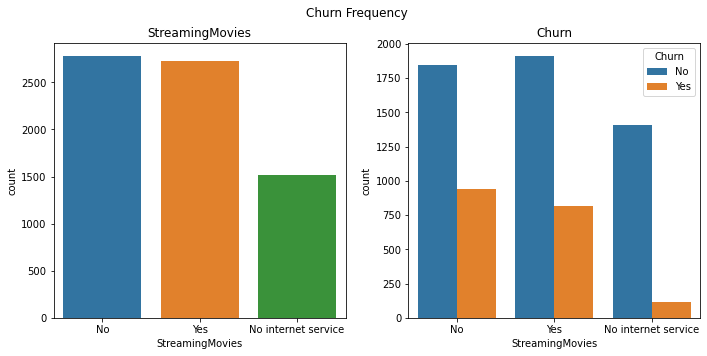

In [40]:
categoricalAnalysis('StreamingMovies')

No internet Service data is common in multiple columns and Streaming movies doent affect churn data so we can drop it.

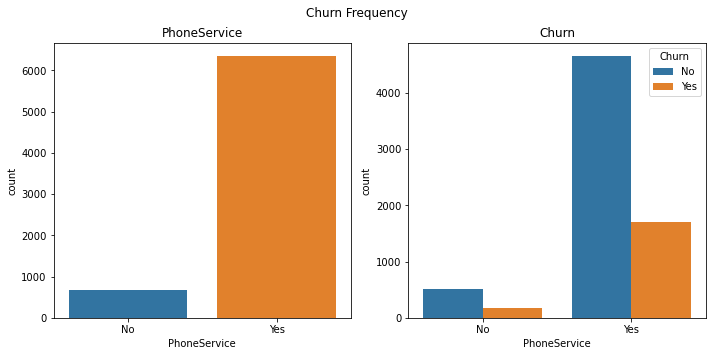

In [41]:
categoricalAnalysis('PhoneService')

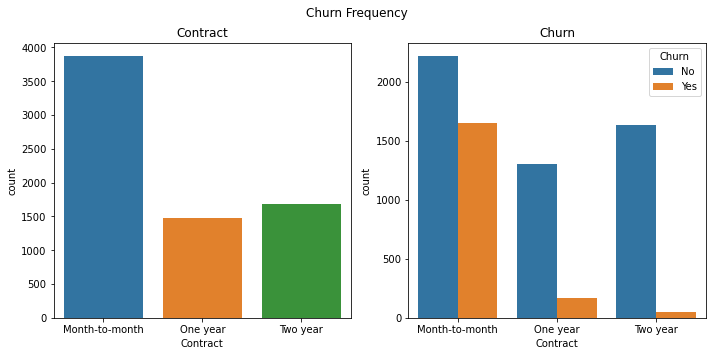

In [42]:
categoricalAnalysis('Contract')

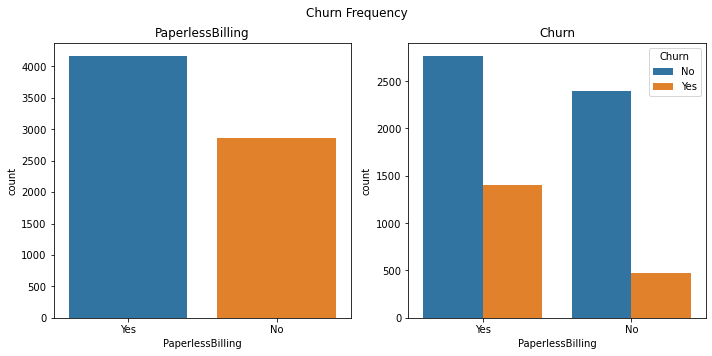

In [43]:
categoricalAnalysis('PaperlessBilling')

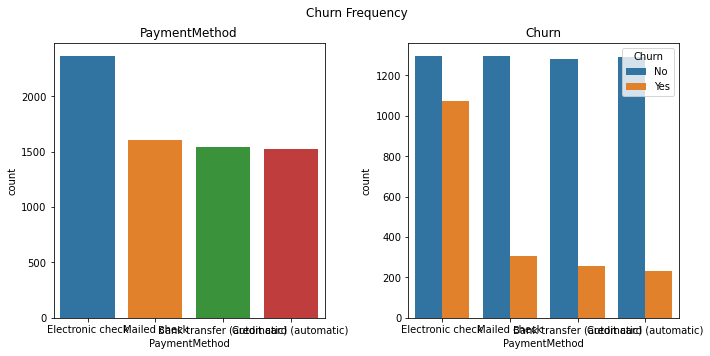

In [44]:
categoricalAnalysis('PaymentMethod')

In [45]:
#Combining payment methods Bank transfer (automatic), Mailed Check and Credit Card (automatic), as they ahve same frequency 
#and churning effect but overall payment method data shows variations.
data.PaymentMethod.replace(['Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],'others', inplace = True)

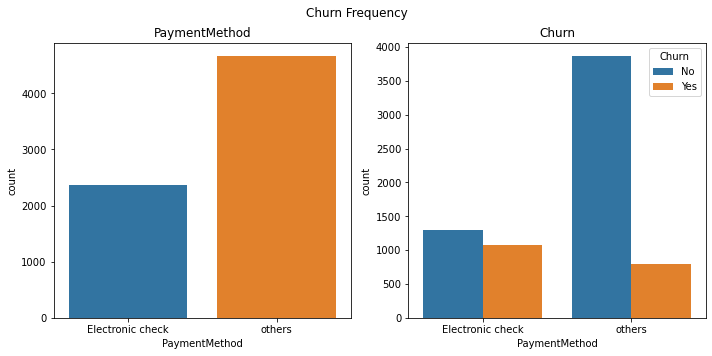

In [46]:
categoricalAnalysis('PaymentMethod')

In [47]:
# from our analysis we can select variables that are significant in client churn.
varlist = list(data.columns)
for x in ['gender','StreamingTV','StreamingMovies', 'customerID']:
    varlist.remove(x)
varlist

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [48]:
final_df = data[varlist]

In [49]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


final_df[varlist] = final_df[varlist].apply(binary_map)

In [50]:
final_df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,No phone service,DSL,No,Yes,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,No,DSL,Yes,No,Yes,No,34,1,One year,0,others,56.95,1889.50,0
2,0,0,0,No,DSL,Yes,Yes,No,No,2,1,Month-to-month,1,others,53.85,108.15,1
3,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,45,0,One year,0,others,42.30,1840.75,0
4,0,0,0,No,Fiber optic,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [51]:
final_df = pd.get_dummies(final_df, drop_first = False)

In [52]:
final_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_others
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,0,1,1,0,0,0,1,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,0,1,0,0,1,0,1,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,...,0,0,1,0,0,1,0,0,1,0


In [53]:
final_df.isnull().sum()

SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
PaperlessBilling                        0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
MultipleLines_No                        0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_DSL                     0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No                         0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No                     0
DeviceProtection_No internet service    0
DeviceProtection_Yes              

Model Building

In [54]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final_df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = list(df_train.columns)
df_train[cols] = scaler.fit_transform(df_train[cols])

In [56]:
y_train = df_train.pop('Churn')
x_train = df_train


In [57]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [58]:
# checking accuracy for training data
from sklearn.metrics import accuracy_score
y_train_predictions = logreg.predict(x_train)
accuracy_score(y_train, y_train_predictions)

0.8061369640317009

In [59]:
# checking accuracy for test data
cols = list(df_test.columns)
df_test[cols] = scaler.fit_transform(df_test[cols])
y_test = df_test.pop('Churn')
x_test = df_test
y_test_predictions = logreg.predict(x_test)
accuracy_score(y_test, y_test_predictions)

0.7985781990521327

In [60]:
# there is hardly any variation in test and train scores. so the is negligible overfitting.
a = (accuracy_score(y_train, y_train_predictions) - accuracy_score(y_test, y_test_predictions))*100
print(f' Variation between accuracy scores of Training and testing data is {a}%')

 Variation between accuracy scores of Training and testing data is 0.75587649795682%


In [61]:
# Checking accuracy variation for C = 100 i.e. lowering regularization
logregc100 = LogisticRegression(C = 100, solver='liblinear', random_state=42)
logregc100.fit(x_train, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [62]:
# checking accuracy training
y_train_predictions = logregc100.predict(x_train)
accuracy_score(y_train, y_train_predictions)

0.8065433854907539

In [63]:
# checking accuracy test
y_test_predictions = logregc100.predict(x_test)
accuracy_score(y_test, y_test_predictions)

0.7966824644549763

In [64]:
a = (accuracy_score(y_train, y_train_predictions) - accuracy_score(y_test, y_test_predictions))*100
print(f' Variation between accuracy scores of Training and testing data is {a}%')

 Variation between accuracy scores of Training and testing data is 0.9860921035777626%


In [65]:
# Checking accuracy variation for C = 0.001 i.e. increasing regularization
logregc001 = LogisticRegression(C = 0.01, solver='liblinear', random_state=42)
logregc001.fit(x_train, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [66]:
# checking accuracy training
y_train_predictions = logregc001.predict(x_train)
accuracy_score(y_train, y_train_predictions)

0.8028855923592766

In [67]:
# checking accuracy test
y_test_predictions = logregc001.predict(x_test)
accuracy_score(y_test, y_test_predictions)

0.790521327014218

In [68]:
a = (accuracy_score(y_train, y_train_predictions) - accuracy_score(y_test, y_test_predictions))*100
print(f' Variation between accuracy scores of Training and testing data is {a}%')

 Variation between accuracy scores of Training and testing data is 1.2364265345058634%


Both training and testing accuracies increase with lowering regualrization and decrease with increasing regularization. The change however is negligible.  Moreover doing either of them increase the difference between Test accuracy and Training accuracy so logistic regression model with regularization factor 1 is suitable for us.

In [69]:
# for further efficiency analysis we will consider logistic regression model with liblinear solver and c = 1

In [70]:
logreg.fit(x_train, y_train)
y_train_predictions = logreg.predict(x_train)
print('Training Accuracy:', accuracy_score(y_train, y_train_predictions))
y_test_predictions = logreg.predict(x_test)
print('Training Accuracy:', accuracy_score(y_test, y_test_predictions))
a = (accuracy_score(y_train, y_train_predictions) - accuracy_score(y_test, y_test_predictions))*100
print(f'Variation between accuracy scores of Training and testing data is {a}%')

Training Accuracy: 0.8061369640317009
Training Accuracy: 0.7985781990521327
Variation between accuracy scores of Training and testing data is 0.75587649795682%


In [71]:

y_test.value_counts()

0.0    1544
1.0     566
Name: Churn, dtype: int64

In [72]:
# null accuracy check
null_accuracy = (1544/(1544+566))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7318


Both Test and Training scores are well above null accuracy so our model is good.

<AxesSubplot:>

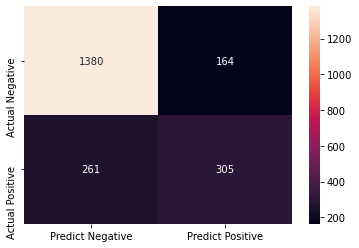

In [73]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_predictions)
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [74]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [75]:
# Classification report Test
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1544
         1.0       0.65      0.54      0.59       566

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [76]:
# Classification report Train
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      3618
         1.0       0.66      0.56      0.61      1303

    accuracy                           0.81      4921
   macro avg       0.75      0.73      0.74      4921
weighted avg       0.80      0.81      0.80      4921



<AxesSubplot:ylabel='Count'>

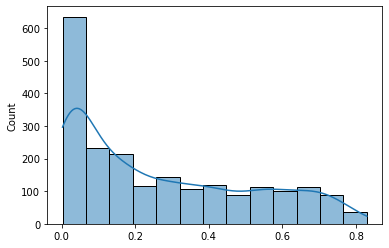

In [77]:
y_pred1 = logreg.predict_proba(x_test)[:, 1]
sns.histplot(y_pred1, kde = True)

The histogram of prediction values is highly skewed. This is because most customers will not churn.

In [78]:
# we will check accuracy for various cutoff thresholds
from sklearn.preprocessing import binarize

for i in range(1,9):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
       
    cm1 = confusion_matrix(y_test, y_pred2)
    TP = cm1[1,1]
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    Accuracy  = (accuracy_score(y_test, y_pred2))
    Precision  = (TP/(TP+FP))  
    Sensitivity =(TP/(TP+FN))
    Specificity = (TN/(TN+FP))
    F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
    print(f'With {i/10} threshold the Confusion Matrix is')
    print(cm1)
    print('Correct Predictions:' ,TP+TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    print('Accuracy:',Accuracy)
    print('Precision:',Precision)
    print('Sensitivity:',Sensitivity)
    print('Specificity:',Specificity)
    print('F1:', F1)
    print('\n\n')

With 0.1 threshold the Confusion Matrix is
[[737 807]
 [ 35 531]]
Correct Predictions: 1268
False Positives: 807
False Negatives: 35
Accuracy: 0.6009478672985782
Precision: 0.3968609865470852
Sensitivity: 0.9381625441696113
Specificity: 0.47733160621761656
F1: 0.5577731092436975



With 0.2 threshold the Confusion Matrix is
[[1004  540]
 [  87  479]]
Correct Predictions: 1483
False Positives: 540
False Negatives: 87
Accuracy: 0.7028436018957346
Precision: 0.47006869479882235
Sensitivity: 0.8462897526501767
Specificity: 0.6502590673575129
F1: 0.6044164037854889



With 0.3 threshold the Confusion Matrix is
[[1160  384]
 [ 133  433]]
Correct Predictions: 1593
False Positives: 384
False Negatives: 133
Accuracy: 0.7549763033175355
Precision: 0.5299877600979193
Sensitivity: 0.765017667844523
Specificity: 0.7512953367875648
F1: 0.6261749819233551



With 0.4 threshold the Confusion Matrix is
[[1291  253]
 [ 198  368]]
Correct Predictions: 1659
False Positives: 253
False Negatives: 198
Accura

Given the scores, threshold between 3 to 5 is suggested based on most desirable parameter.

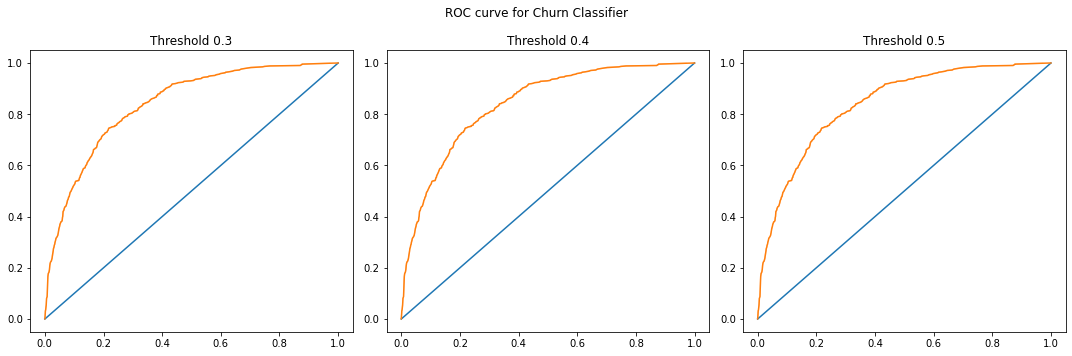

In [96]:
# plotting ROC Curve
# plot ROC Curve

from sklearn.metrics import roc_curve
y_pred3 = logreg.predict_proba(x_test)[:,1]

y_pred4 = logreg.predict_proba(x_test)[:,1]

y_pred5 = logreg.predict_proba(x_test)[:,1]

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)


fig, axs = plt.subplots(1,3, figsize = (15,5))
plt.suptitle('ROC curve for Churn Classifier')
axs[0].set_title('Threshold 0.3')
sns.lineplot([0,1], [0,1], ax = axs[0] )
sns.lineplot(fpr3, tpr3, ax = axs[0] )
axs[1].set_title('Threshold 0.4')
sns.lineplot([0,1], [0,1], ax = axs[1])
sns.lineplot(fpr4, tpr4, ax = axs[1] )
axs[2].set_title('Threshold 0.5')
sns.lineplot([0,1], [0,1], ax = axs[2] )
sns.lineplot(fpr5, tpr5, ax = axs[2] )
plt.tight_layout()

In [97]:
from sklearn.metrics import roc_auc_score
print('ROC AUC 0.3: {:.4f}'.format(roc_auc_score(y_test, y_pred3)))
print('ROC AUC 0.4: {:.4f}'.format(roc_auc_score(y_test, y_pred4)))
print('ROC AUC 0.5: {:.4f}'.format(roc_auc_score(y_test, y_pred5)))

ROC AUC 0.3: 0.8384
ROC AUC 0.4: 0.8384
ROC AUC 0.5: 0.8384


Clearly the ROC AUC score is close to model accuracy.

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.82150101 0.80284553 0.81504065 0.76829268 0.79471545 0.80081301
 0.79268293 0.82723577 0.79065041 0.83739837]


In [99]:
print('Average 10 fold Cross Validation Accuracy: ', scores.mean())

Average 10 fold Cross Validation Accuracy:  0.8051175810946752


In [100]:
#Cross validation scoring for test data
scores = cross_val_score(logreg, x_test, y_test, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80094787 0.78672986 0.79620853 0.82938389 0.78199052 0.8056872
 0.77251185 0.78199052 0.7535545  0.8056872 ]


In [101]:
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Average 10 fold Cross Validation Accuracy for testing data:  0.791469194312796


In [102]:
# Hyperparameter Optimization using GridSearch CV
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[0.001, 0.01,0.1, 1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))



GridSearch CV best score : 0.8055


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=42, solver='liblinear')


In [103]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.7995


Results:

Our best suited model is LogisticRegression(C = 1, penalty = 'l1', random_state = 42, solver = 'liblinear')

Suitable Threshold values, 0.3, 0.4, 0.5

Using this mode we get following scores

Training Accuracy: 0.8061369640317009

Training Accuracy: 0.7985781990521327

Variation between accuracy scores of Training and testing data is 0.75587649795682%

In [104]:
#We shall now try decision tree classifier for the same problem
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
# tried for max depth 5 and 6  best result at 4
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [105]:
train_gini_predictions = clf_gini.predict(x_train)
test_gini_predictions = clf_gini.predict(x_test)

In [106]:
print('Training Accuracy: ' ,accuracy_score(y_train, train_gini_predictions))
print('Testing Accuracy: ' ,accuracy_score(y_test, test_gini_predictions))

Training Accuracy:  0.7998374314163788
Testing Accuracy:  0.7838862559241706


[Text(418.5, 733.86, 'X[26] <= 0.5\ngini = 0.389\nsamples = 4921\nvalue = [3618, 1303]'),
 Text(209.25, 570.78, 'X[6] <= 0.752\ngini = 0.122\nsamples = 2228\nvalue = [2083, 145]'),
 Text(104.625, 407.70000000000005, 'X[14] <= 0.5\ngini = 0.066\nsamples = 1672\nvalue = [1615, 57]'),
 Text(52.3125, 244.62, 'X[7] <= 0.002\ngini = 0.041\nsamples = 1329\nvalue = [1301, 28]'),
 Text(26.15625, 81.54000000000008, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(78.46875, 81.54000000000008, 'gini = 0.039\nsamples = 1319\nvalue = [1293, 26]'),
 Text(156.9375, 244.62, 'X[27] <= 0.5\ngini = 0.155\nsamples = 343\nvalue = [314, 29]'),
 Text(130.78125, 81.54000000000008, 'gini = 0.05\nsamples = 117\nvalue = [114, 3]'),
 Text(183.09375, 81.54000000000008, 'gini = 0.204\nsamples = 226\nvalue = [200, 26]'),
 Text(313.875, 407.70000000000005, 'X[27] <= 0.5\ngini = 0.266\nsamples = 556\nvalue = [468, 88]'),
 Text(261.5625, 244.62, 'X[6] <= 0.757\ngini = 0.159\nsamples = 275\nvalue = [251, 24]'),
 Text(

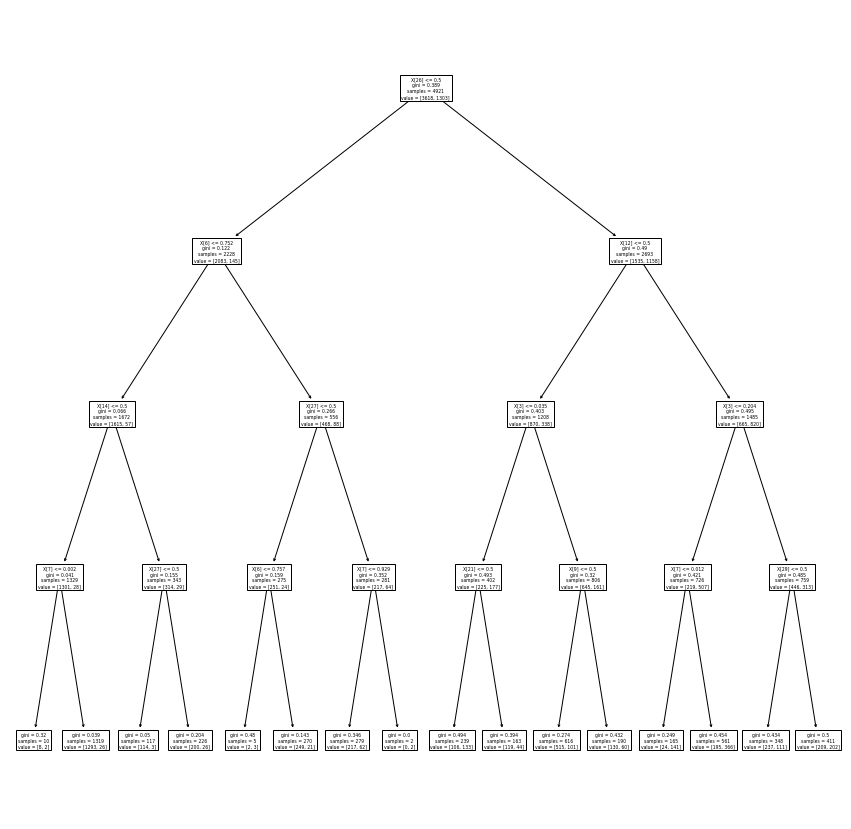

In [107]:
plt.figure(figsize=(15,15))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))

<AxesSubplot:>

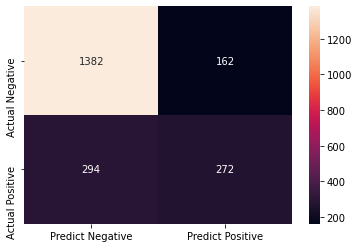

In [108]:
cm = confusion_matrix(y_test, test_gini_predictions)
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [109]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [111]:
Accuracy  = (accuracy_score(y_test, test_gini_predictions))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1654
False Positives: 162
False Negatives: 294
Accuracy: 0.7838862559241706
Precision: 0.6267281105990783
Sensitivity: 0.48056537102473496
Specificity: 0.8950777202072538
F1: 0.544


In [141]:
print(classification_report(y_test, test_gini_predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1544
         1.0       0.63      0.48      0.54       566

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<AxesSubplot:>

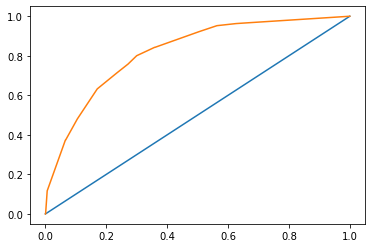

In [128]:
y_pred = clf_gini.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [129]:
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8197


In [130]:
scores = cross_val_score(clf_gini, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.77484787 0.79471545 0.80691057 0.7601626  0.7703252  0.80284553
 0.77235772 0.80691057 0.79878049 0.82520325]


In [132]:
parameters = [{'max_depth':[3,4,5]}]



grid_search = GridSearchCV(estimator = clf_gini,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV best score : 0.7964


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=5, random_state=42)


In [134]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [135]:
train_en_predictions = clf_en.predict(x_train)
test_en_predictions = clf_en.predict(x_test)
print('Training Accuracy: ' ,accuracy_score(y_train, train_en_predictions))
print('Testing Accuracy: ' ,accuracy_score(y_test, test_en_predictions))

Training Accuracy:  0.8053241211135947
Testing Accuracy:  0.7838862559241706


[Text(325.83214285714286, 398.64, 'X[26] <= 0.5\nentropy = 0.834\nsamples = 4921\nvalue = [3618, 1303]'),
 Text(173.37857142857143, 326.15999999999997, 'X[6] <= 0.752\nentropy = 0.347\nsamples = 2228\nvalue = [2083, 145]'),
 Text(95.65714285714286, 253.67999999999998, 'X[28] <= 0.5\nentropy = 0.215\nsamples = 1672\nvalue = [1615, 57]'),
 Text(47.82857142857143, 181.2, 'X[6] <= 0.24\nentropy = 0.335\nsamples = 759\nvalue = [712, 47]'),
 Text(23.914285714285715, 108.71999999999997, 'X[7] <= 0.002\nentropy = 0.141\nsamples = 300\nvalue = [294, 6]'),
 Text(11.957142857142857, 36.23999999999995, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(35.871428571428574, 36.23999999999995, 'entropy = 0.104\nsamples = 292\nvalue = [288, 4]'),
 Text(71.74285714285715, 108.71999999999997, 'X[6] <= 0.244\nentropy = 0.434\nsamples = 459\nvalue = [418, 41]'),
 Text(59.785714285714285, 36.23999999999995, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(83.7, 36.23999999999995, 'entropy = 0.428\n

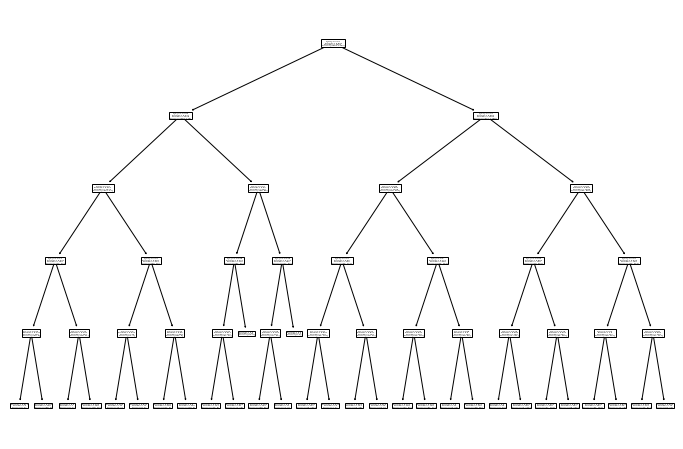

In [136]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

In [143]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_en_predictions)
cm

array([[1308,  236],
       [ 220,  346]], dtype=int64)

<AxesSubplot:>

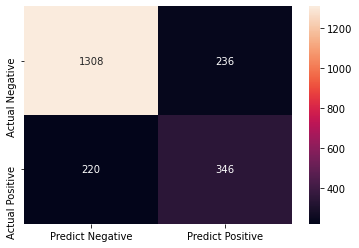

In [144]:
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [145]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, test_en_predictions))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1654
False Positives: 236
False Negatives: 220
Accuracy: 0.7838862559241706
Precision: 0.5945017182130584
Sensitivity: 0.6113074204946997
Specificity: 0.8471502590673575
F1: 0.602787456445993


In [146]:
print(classification_report(y_test, test_en_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1544
         1.0       0.59      0.61      0.60       566

    accuracy                           0.78      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.78      0.78      2110



<AxesSubplot:>

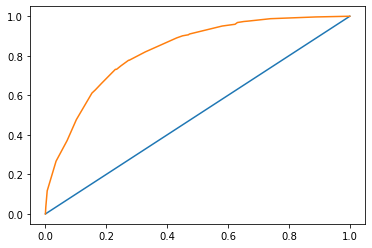

In [147]:
y_pred = clf_en.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [148]:
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8257


In [149]:
scores = cross_val_score(clf_en, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.79918864 0.80487805 0.79674797 0.75406504 0.77235772 0.79674797
 0.78861789 0.82113821 0.79471545 0.82113821]
Average 10 fold Cross Validation Accuracy for testing data:  0.7949595145038673


In [150]:
parameters = [{'max_depth':[3,4,5]}]



grid_search = GridSearchCV(estimator = clf_en,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV best score : 0.7950


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
GridSearch CV score on test set: 0.7839


Applying Random Forest classifier


In [151]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state= 42, max_depth=3, criterion='gini')
rfc.fit(x_train, y_train )

RandomForestClassifier(max_depth=3, random_state=42)

In [152]:
y_pred_forest_train = rfc.predict(x_train)
y_pred_forest_test = rfc.predict(x_test)

In [153]:
print('Training accuracy: ', accuracy_score(y_train, y_pred_forest_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_forest_test))

Training accuracy:  0.792521845153424
Testing accuracy:  0.7838862559241706


In [154]:
print(classification_report(y_test, y_pred_forest_test))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      1544
         1.0       0.70      0.34      0.46       566

    accuracy                           0.78      2110
   macro avg       0.75      0.64      0.66      2110
weighted avg       0.77      0.78      0.76      2110



<AxesSubplot:>

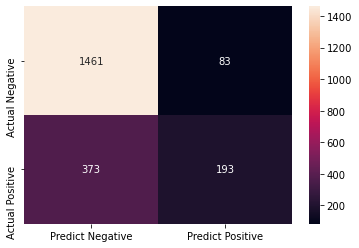

In [155]:
cm = confusion_matrix(y_test, y_pred_forest_test )
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [156]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, test_gini_predictions))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1654
False Positives: 83
False Negatives: 373
Accuracy: 0.7838862559241706
Precision: 0.6992753623188406
Sensitivity: 0.3409893992932862
Specificity: 0.9462435233160622
F1: 0.4584323040380047


<AxesSubplot:>

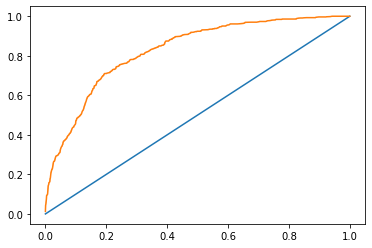

In [157]:
y_pred = rfc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [158]:
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8274


In [160]:
scores = cross_val_score(rfc, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.79107505 0.79268293 0.80284553 0.77235772 0.77235772 0.78658537
 0.77845528 0.81300813 0.77642276 0.80081301]
Average 10 fold Cross Validation Accuracy for testing data:  0.7886603505994492


In [161]:
parameters = [{'max_depth':[3,4,5]}, {'criterion': ['gini','entrophy']}]



grid_search = GridSearchCV(estimator = rfc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV best score : 0.7988


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_depth=5, random_state=42)
GridSearch CV score on test set: 0.7867


Now using XGBoost

In [163]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

[11:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_pred_xgb_train = xgb_clf.predict(x_train)
y_pred_xgb_test = xgb_clf.predict(x_test)
print('Training accuracy: ', accuracy_score(y_train, y_pred_xgb_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_xgb_test))

Training accuracy:  0.8260516155252997
Testing accuracy:  0.7938388625592417


In [166]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1544
         1.0       0.64      0.53      0.58       566

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



<AxesSubplot:>

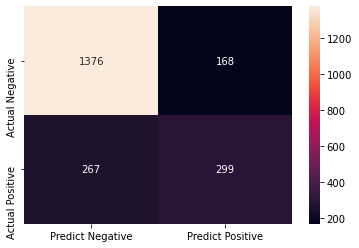

In [170]:
cm = confusion_matrix(y_test, y_pred_xgb_test )
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [171]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, y_pred_xgb_test ))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1675
False Positives: 168
False Negatives: 267
Accuracy: 0.7938388625592417
Precision: 0.6402569593147751
Sensitivity: 0.5282685512367491
Specificity: 0.8911917098445595
F1: 0.5788964181994192


<AxesSubplot:>

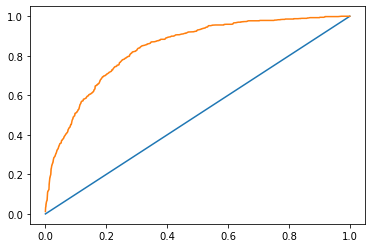

In [172]:
y_pred = xgb_clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [173]:
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8383


In [174]:
scores = cross_val_score(xgb_clf, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

[11:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [175]:
parameters = [{'max_depth':[3,4,5,6,7]}]



grid_search = GridSearchCV(estimator = xgb_clf,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

[11:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel